In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime,date

# File to Load
LNSDF=pd.read_pickle('resources/LNS2020.pkl',compression='gzip')
# Preview of the DataFrame
LNSDF.head()

,series_id,year,value,Month,lfst_code,periodicity_code,series_title,activity_code,ages_code,class_code,duration_code,education_code,entr_code,expr_code,indy_text
0,LNS11000000,2015,157030.0,1,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
1,LNS11000000,2015,156644.0,2,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
2,LNS11000000,2015,156643.0,3,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
3,LNS11000000,2015,157060.0,4,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
4,LNS11000000,2015,157651.0,5,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries


In [2]:
# Check for correct data types - need to convert
LNSDF.dtypes

series_id            object
year                  int64
value               float64
Month                 int64
lfst_code             int64
periodicity_code     object
series_title         object
activity_code         int64
ages_code            object
class_code            int64
duration_code         int64
education_code       object
entr_code             int64
expr_code             int64
indy_text            object
dtype: object

In [3]:
# Check column names for spaces - looks good
LNSDF.columns

Index(['series_id', 'year', 'value', 'Month', 'lfst_code', 'periodicity_code',
       'series_title', 'activity_code', 'ages_code', 'class_code',
       'duration_code', 'education_code', 'entr_code', 'expr_code',
       'indy_text'],
      dtype='object')

In [4]:
# Identify incomplete rows
LNSDF.count()

series_id           1300
year                1300
value               1300
Month               1300
lfst_code           1300
periodicity_code    1300
series_title        1300
activity_code       1300
ages_code           1300
class_code          1300
duration_code       1300
education_code      1300
entr_code           1300
expr_code           1300
indy_text           1300
dtype: int64

In [5]:
# Drop all rows with missing information
# df = unemployment_df.dropna(how='any')

In [6]:
# Verify dropped rows
LNSDF.count()

series_id           1300
year                1300
value               1300
Month               1300
lfst_code           1300
periodicity_code    1300
series_title        1300
activity_code       1300
ages_code           1300
class_code          1300
duration_code       1300
education_code      1300
entr_code           1300
expr_code           1300
indy_text           1300
dtype: int64

In [7]:
# Check states values
LNSDF['series_id'].value_counts()

LNS13032183    65
LNS13024230    65
LNS13000000    65
LNS11000002    65
LNS11000001    65
LNS13027662    65
LNS13000012    65
LNS13027689    65
LNS13000091    65
LNS13000002    65
LNS13027659    65
LNS13000001    65
LNS13000093    65
LNS13000006    65
LNS11000000    65
LNS13027660    65
LNS13000089    65
LNS13000003    65
LNS13000009    65
LNS13000036    65
Name: series_id, dtype: int64

In [8]:
# Display a statistical overview for a high level insight into the data
LNSDF.describe()

,year,value,Month,lfst_code,activity_code,class_code,duration_code,entr_code,expr_code
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.0,1300.0,1300.0,1300.0,1300.0
mean,2017.230769,17875.998462,6.230769,27.000000,0.0,0.0,0.0,0.0,0.0
std,1.577061,40307.361619,3.468851,7.144177,0.0,0.0,0.0,0.0,0.0
min,2015.000000,217.000000,1.000000,10.000000,0.0,0.0,0.0,0.0,0.0
25%,2016.000000,1137.000000,3.000000,30.000000,0.0,0.0,0.0,0.0,0.0
50%,2017.000000,1489.500000,6.000000,30.000000,0.0,0.0,0.0,0.0,0.0
75%,2019.000000,4413.250000,9.000000,30.000000,0.0,0.0,0.0,0.0,0.0
max,2020.000000,164606.000000,12.000000,30.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
print(LNSDF)

         series_id  year     value  Month  lfst_code periodicity_code  \
0      LNS11000000  2015  157030.0      1         10                M   
1      LNS11000000  2015  156644.0      2         10                M   
2      LNS11000000  2015  156643.0      3         10                M   
3      LNS11000000  2015  157060.0      4         10                M   
4      LNS11000000  2015  157651.0      5         10                M   
...            ...   ...       ...    ...        ...              ...   
29375  LNS13032183  2020     315.0      1         30                M   
29376  LNS13032183  2020     262.0      2         30                M   
29377  LNS13032183  2020     433.0      3         30                M   
29378  LNS13032183  2020    1438.0      4         30                M   
29379  LNS13032183  2020    1493.0      5         30                M   

                            series_title  activity_code ages_code  class_code  \
0      (Seas) Civilian Labor Force Level  

In [10]:
series = LNSDF['series_id'].unique()
print(series)

['LNS11000000' 'LNS11000001' 'LNS11000002' 'LNS13000000' 'LNS13000001'
 'LNS13000002' 'LNS13000003' 'LNS13000006' 'LNS13000009' 'LNS13000012'
 'LNS13000036' 'LNS13000089' 'LNS13000091' 'LNS13000093' 'LNS13024230'
 'LNS13027659' 'LNS13027660' 'LNS13027662' 'LNS13027689' 'LNS13032183']


In [11]:
condition = LNSDF['series_id'].isin(series)
LNSSeriesDF = LNSDF[condition]
LNSSeriesDF.head()

,series_id,year,value,Month,lfst_code,periodicity_code,series_title,activity_code,ages_code,class_code,duration_code,education_code,entr_code,expr_code,indy_text
0,LNS11000000,2015,157030.0,1,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
1,LNS11000000,2015,156644.0,2,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
2,LNS11000000,2015,156643.0,3,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
3,LNS11000000,2015,157060.0,4,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
4,LNS11000000,2015,157651.0,5,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries


In [12]:
unemp_df = LNSSeriesDF[['year','Month','value','series_title']]

unemp_df['date']=unemp_df['year'].astype(str) + "-"+ unemp_df['Month'].astype(str) 
unemp_df.head()

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,Month,value,series_title,date
0,2015,1,157030.0,(Seas) Civilian Labor Force Level,2015-1
1,2015,2,156644.0,(Seas) Civilian Labor Force Level,2015-2
2,2015,3,156643.0,(Seas) Civilian Labor Force Level,2015-3
3,2015,4,157060.0,(Seas) Civilian Labor Force Level,2015-4
4,2015,5,157651.0,(Seas) Civilian Labor Force Level,2015-5


In [13]:
print(unemp_df)

       year  Month     value                       series_title    date
0      2015      1  157030.0  (Seas) Civilian Labor Force Level  2015-1
1      2015      2  156644.0  (Seas) Civilian Labor Force Level  2015-2
2      2015      3  156643.0  (Seas) Civilian Labor Force Level  2015-3
3      2015      4  157060.0  (Seas) Civilian Labor Force Level  2015-4
4      2015      5  157651.0  (Seas) Civilian Labor Force Level  2015-5
...     ...    ...       ...                                ...     ...
29375  2020      1     315.0  (Seas) Unemployment Level - Asian  2020-1
29376  2020      2     262.0  (Seas) Unemployment Level - Asian  2020-2
29377  2020      3     433.0  (Seas) Unemployment Level - Asian  2020-3
29378  2020      4    1438.0  (Seas) Unemployment Level - Asian  2020-4
29379  2020      5    1493.0  (Seas) Unemployment Level - Asian  2020-5

[1300 rows x 5 columns]


unemp_df = pd.pivot_table(unemp_df,index=["date"],values=["value"],columns=["series_title"])
unemp_df.head()

unemp_df.reset_index(inplace=True)

In [14]:
unemp_df.rename(columns={'Month':'month','value':'claims','series_title':'category'}, inplace=True)
print(unemp_df)

       year  month    claims                           category    date
0      2015      1  157030.0  (Seas) Civilian Labor Force Level  2015-1
1      2015      2  156644.0  (Seas) Civilian Labor Force Level  2015-2
2      2015      3  156643.0  (Seas) Civilian Labor Force Level  2015-3
3      2015      4  157060.0  (Seas) Civilian Labor Force Level  2015-4
4      2015      5  157651.0  (Seas) Civilian Labor Force Level  2015-5
...     ...    ...       ...                                ...     ...
29375  2020      1     315.0  (Seas) Unemployment Level - Asian  2020-1
29376  2020      2     262.0  (Seas) Unemployment Level - Asian  2020-2
29377  2020      3     433.0  (Seas) Unemployment Level - Asian  2020-3
29378  2020      4    1438.0  (Seas) Unemployment Level - Asian  2020-4
29379  2020      5    1493.0  (Seas) Unemployment Level - Asian  2020-5

[1300 rows x 5 columns]


/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [15]:
print(unemp_df['category'].unique())

['(Seas) Civilian Labor Force Level'
 '(Seas) Civilian Labor Force Level - Men'
 '(Seas) Civilian Labor Force Level - Women' '(Seas) Unemployment Level'
 '(Seas) Unemployment Level - Men' '(Seas) Unemployment Level - Women'
 '(Seas) Unemployment Level - White'
 '(Seas) Unemployment Level - Black or African American'
 '(Seas) Unemployment Level - Hispanic or Latino'
 '(Seas) Unemployment Level - 16-19 yrs.'
 '(Seas) Unemployment Level - 20-24 yrs.'
 '(Seas) Unemployment Level - 25-34 yrs.'
 '(Seas) Unemployment Level - 35-44 yrs.'
 '(Seas) Unemployment Level - 45-54 yrs.'
 '(Seas) Unemployment Level - 55 yrs. & over'
 '(Seas) Unemployment Level - Less than a High School Diploma, 25 yrs. & over'
 '(Seas) Unemployment Level - High School Graduates, No College, 25 yrs. & over'
 "(Seas) Unemployment Level - Bachelor's degree and higher, 25 yrs. & over"
 '(Seas) Unemployment Level - Some College or Associate Degree, 25 yrs. & over'
 '(Seas) Unemployment Level - Asian']


In [16]:
unemp_df['category'].replace({"(Seas) Civilian Labor Force Level":"labor_force_total",
                                  "(Seas) Civilian Labor Force Level - Men":"labor_force_men",
                                  "(Seas) Civilian Labor Force Level - Women":"labor_force_women",
                                  "(Seas) Unemployment Level":"unemployment_total",
                                  "(Seas) Unemployment Level - Men":"gender_men",
                                  "(Seas) Unemployment Level - Women":"gender_women",
                                  "(Seas) Unemployment Level - White":"ethnicity_caucasian",
                                  "(Seas) Unemployment Level - Black or African American":"ethnicity_african_american",
                                  "(Seas) Unemployment Level - Hispanic or Latino":"ethnicity_hispanic",
                                  "(Seas) Unemployment Level - Asian":"ethnicity_asian",
                                  "(Seas) Unemployment Level - 16-19 yrs.":"age_range_16-19",
                                  "(Seas) Unemployment Level - 20-24 yrs.":"age_range_20-24",
                                  "(Seas) Unemployment Level - 25-34 yrs.":"age_range_25-34",
                                  "(Seas) Unemployment Level - 35-44 yrs.":"age_range_35-44",
                                  "(Seas) Unemployment Level - 45-54 yrs.":"age_range_45-54",
                                  "(Seas) Unemployment Level - 55 yrs. & over":"age_range_55_and_over",
                                  "(Seas) Unemployment Level - Less than a High School Diploma, 25 yrs. & over":"education_less_than_highschool_diploma",
                                  "(Seas) Unemployment Level - High School Graduates, No College, 25 yrs. & over":"education_highschool_no_college",
                                  "(Seas) Unemployment Level - Some College or Associate Degree, 25 yrs. & over":"education_some_college_or_associate_degree",
                                  "(Seas) Unemployment Level - Bachelor's degree and higher, 25 yrs. & over":"education_bachelors_degree_and_higher"
                                 },inplace=True)

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
print(unemp_df)

       year  month    claims           category    date
0      2015      1  157030.0  labor_force_total  2015-1
1      2015      2  156644.0  labor_force_total  2015-2
2      2015      3  156643.0  labor_force_total  2015-3
3      2015      4  157060.0  labor_force_total  2015-4
4      2015      5  157651.0  labor_force_total  2015-5
...     ...    ...       ...                ...     ...
29375  2020      1     315.0    ethnicity_asian  2020-1
29376  2020      2     262.0    ethnicity_asian  2020-2
29377  2020      3     433.0    ethnicity_asian  2020-3
29378  2020      4    1438.0    ethnicity_asian  2020-4
29379  2020      5    1493.0    ethnicity_asian  2020-5

[1300 rows x 5 columns]


In [18]:
# Export clean data to CSV for analysis

output_file = "Resources/Demographics_Data.csv"
unemp_df.to_csv(output_file,index=False, mode='a')

In [19]:
# get Unemployment level
# LNS13000000 all
# LNS13000001 Men
# LNS13000002  Women
condition = LNSDF['series_id'].isin(['LNS13000000','LNS13000001','LNS13000002'])
allUnemploymentDF = LNSDF[condition]
allUnemploymentDF.head()

,series_id,year,value,Month,lfst_code,periodicity_code,series_title,activity_code,ages_code,class_code,duration_code,education_code,entr_code,expr_code,indy_text
23010,LNS13000000,2015,8885.0,1,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
23011,LNS13000000,2015,8599.0,2,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
23012,LNS13000000,2015,8515.0,3,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
23013,LNS13000000,2015,8550.0,4,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
23014,LNS13000000,2015,8834.0,5,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries


In [20]:
df = allUnemploymentDF[['series_id','year','Month','value']]
df['date']=df['year'].astype(str) + "-"+ df['Month'].astype(str) 
df.head()

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,series_id,year,Month,value,date
23010,LNS13000000,2015,1,8885.0,2015-1
23011,LNS13000000,2015,2,8599.0,2015-2
23012,LNS13000000,2015,3,8515.0,2015-3
23013,LNS13000000,2015,4,8550.0,2015-4
23014,LNS13000000,2015,5,8834.0,2015-5


In [21]:
df = pd.pivot_table(df,index=['date'],values=['value'],columns=['series_id'])
df.head()

value                        
series_id LNS13000000 LNS13000001 LNS13000002
date                                         
2015-1         8885.0      4863.0      4022.0
2015-10        7922.0      4242.0      3680.0
2015-11        8000.0      4339.0      3661.0
2015-12        7907.0      4280.0      3628.0
2015-2         8599.0      4691.0      3908.0

In [22]:
df.reset_index(inplace=True)
df.columns

MultiIndex([( 'date',            ''),
            ('value', 'LNS13000000'),
            ('value', 'LNS13000001'),
            ('value', 'LNS13000002')],
           names=[None, 'series_id'])

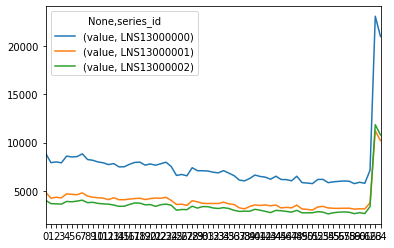

In [23]:
ax = df.plot(xticks=df.index)